In [1]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90) # display all column of dataframe
pd.set_option('display.max_row', 100)
pd.set_option('display.max_colwidth', -1) 
#-----------------------------------------------------------------------

# Table of Contents

    * EDA
    
    * Correlation Map
     
    * Splitting and standardizing data for analysis
    
    * Mutual Information Feature Selection

    * Random Forest Model with Test Data
    
    * Random Forest Model with Validation Data
       
    * Random Forest Feature selection
        
    * Logistic Model with Test Data

    * Logistic Model with Validation Data
    
    * Logistic Feature selection
    
    * Gradient Boosting Model with Test Data     

    * Gradient Boosting Model with Validation Data
    
    * Gradient Boosting Feature selection
    
    * AdaBoosting Model with Test Data     

    * AdaBoosting Model with Validation Data
    
    * AdaBoosting Feature selection
    
    * Comparing Features
    

# EDA 

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [4]:
# import data and clean it
df = pd.read_csv('Contextual_Features.csv')
df.drop(['long','lat','Point'],axis=1,inplace=True)
print('there are ', df.shape[0],'values in the original dataframe')
df.head()

there are  47560 values in the original dataframe


Label  lbpm_sc3_kurtosis  lbpm_sc3_max  lbpm_sc3_mean  lbpm_sc3_skew  \
0  0      153.398791         5.02          0.498818       19.144339       
1  0      196.433558         6.29          0.441782       21.841225       
2  0      179.113675         5.87          0.439786       21.129914       
3  0      227.973282         4.78          0.450893       25.921663       
4  0      177.330391         4.84          0.497024       21.496954       

   lbpm_sc3_variance  lbpm_sc5_kurtosis  lbpm_sc5_max  lbpm_sc5_mean  \
0  1.217022           7.940662           11.16         1.220501        
1  1.271096           7.418572           16.20         1.214437        
2  1.179706           6.447273           14.53         1.212454        
3  0.936733           9.041996           11.68         1.210669        
4  1.017547           9.381053           11.28         1.215264        

   lbpm_sc5_skew  lbpm_sc5_variance  lbpm_sc7_kurtosis  lbpm_sc7_max  \
0  2.027661       5.317961           0.911802           18.85          
1  1.773921       7.223426           0.698769           31.08          
2  1.688199       6.503417           0.605517           28.07          
3  2.256273       4.715903           0.933094           22.78          
4  2.300819       4.602671           1.021796           19.75          

   lbpm_sc7_mean  lbpm_sc7_skew  lbpm_sc7_variance  lsr_sc31_line_contrast  \
0  2.372134       0.398236       14.405029          2.161797                 
1  2.371745       0.295401       23.835093          1.809051                 
2  2.371356       0.281807       22.210624          1.898158                 
3  2.370968       0.398171       15.653240          2.084190                 
4  2.370968       0.442850       13.922419          2.179866                 

   lsr_sc31_line_length  lsr_sc31_line_mean  lsr_sc51_line_contrast  \
0  2.151055              1.000134            3.079660                 
1  1.831827              0.835521            2.932289                 
2  1.905103              0.974359            2.979634                 
3  2.100649              1.151780            3.034942                 
4  2.177779              1.173987            3.068848                 

   lsr_sc51_line_length  lsr_sc51_line_mean  lsr_sc71_line_contrast  \
0  3.158707              1.037654            3.791711                 
1  3.096902              1.015008            3.584475                 
2  3.105585              1.048742            3.683048                 
3  3.114227              1.105454            3.702717                 
4  3.161915              1.146521            3.714394                 

   lsr_sc71_line_length  lsr_sc71_line_mean  ndvi_sc3_mean  ndvi_sc3_variance  \
0  3.895024              0.973391            0.312586       0.002839            
1  3.758436              1.103619            0.498261       0.000574            
2  3.828014              1.131314            0.319638       0.002933            
3  3.828475              1.133503            0.360272       0.003211            
4  3.834895              1.135494            0.207045       0.001892            

   ndvi_sc5_mean  ndvi_sc5_variance  ndvi_sc7_mean  ndvi_sc7_variance  \
0  0.206390       0.023505           0.154050       0.045298            
1  0.328948       0.036528           0.243649       0.077184            
2  0.209330       0.024486           0.154652       0.046360            
3  0.235134       0.025978           0.171854       0.048739            
4  0.138223       0.011928           0.104463       0.023371            

   orb_sc31_kurtosis  orb_sc31_max  orb_sc31_mean  orb_sc31_skew  \
0  0.0                0.0           0.0            0.0             
1  0.0                0.0           0.0            0.0             
2  0.0                0.0           0.0            0.0             
3  0.0                0.0           0.0            0.0             
4  0.0                0.0           0.0            0.0             

   orb_sc31_variance  orb_sc

In [5]:
# create pie chart data
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  32089  67.47     
0  15202  31.96     
1  269    0.57

<function matplotlib.pyplot.show(close=None, block=None)>

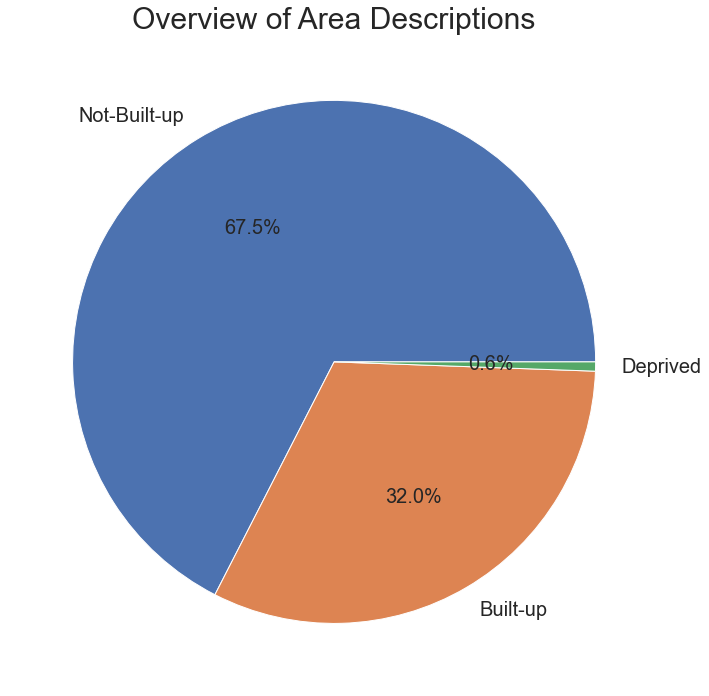

In [6]:
#created pie chart of target variable
plt.figure(figsize= (10,10))
labels = ['Not-Built-up','Built-up', 'Deprived']
plt.title('Overview of Area Descriptions', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [7]:
#checking NAN on Contextual data values
null_values = df[df.isnull().any(axis=1)]
print('there are',df[df.isnull().any(axis=1)].shape[0], 'nan values in the dataframe')
print(null_values['Label'].value_counts())
df.dropna(inplace=True)
print('there are ',df.shape[0],'rows of data after removing nan values')

there are 0 nan values in the dataframe
Series([], Name: Label, dtype: int64)
there are  47560 rows of data after removing nan values


In [8]:
#heat map on Contextual Features
plt.figure(figsize=(150, 150))
plt.title('Correlation Heat Map of Contextual Features\n', fontsize= 250)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='YlOrRd', square=True)
plt.tight_layout()
plt.show()

In [9]:
df.corr()

Label  lbpm_sc3_kurtosis  lbpm_sc3_max  lbpm_sc3_mean  \
Label               1.000000 -0.302913          -0.000131     -0.175409        
lbpm_sc3_kurtosis  -0.302913  1.000000           0.234416      0.630168        
lbpm_sc3_max       -0.000131  0.234416           1.000000      0.798892        
lbpm_sc3_mean      -0.175409  0.630168           0.798892      1.000000        
lbpm_sc3_skew      -0.291976  0.987063           0.316944      0.721454        
...                      ...       ...                ...           ...        
gabor_sc7_filter_7 -0.609011  0.572774           0.270613      0.533125        
gabor_sc7_filter_8 -0.556508  0.348006           0.045515      0.268107        
gabor_sc7_filter_9 -0.608049  0.575867           0.271983      0.535201        
gabor_sc7_mean     -0.611017  0.569805           0.270638      0.531404        
gabor_sc7_variance -0.559045  0.346775           0.045812      0.266841        

                    lbpm_sc3_skew  lbpm_sc3_variance  lbpm_sc5_kurtosis  \
Label              -0.291976       0.152828          -0.351445            
lbpm_sc3_kurtosis   0.987063      -0.188746           0.925408            
lbpm_sc3_max        0.316944       0.869103           0.011108            
lbpm_sc3_mean       0.721454       0.552972           0.500201            
lbpm_sc3_skew       1.000000      -0.096712           0.901798            
...                      ...            ...                ...            
gabor_sc7_filter_7  0.589154       0.006469           0.580350            
gabor_sc7_filter_8  0.346302      -0.117248           0.414458            
gabor_sc7_filter_9  0.592264       0.006506           0.583247            
gabor_sc7_mean      0.586246       0.007093           0.576935            
gabor_sc7_variance  0.345261      -0.117456           0.412768            

                    lbpm_sc5_max  lbpm_sc5_mean  lbpm_sc5_skew  \
Label               0.033324     -0.140048      -0.343722        
lbpm_sc3_kurtosis   0.153702      0.621220       0.944772        
lbpm_sc3_max        0.982738      0.852295       0.094093        
lbpm_sc3_mean       0.711558      0.986170       0.598175        
lbpm_sc3_skew       0.226548      0.712705       0.942683        
...                      ...           ...            ...        
gabor_sc7_filter_7  0.209093      0.493728       0.602121        
gabor_sc7_filter_8  0.004151      0.217892       0.412672        
gabor_sc7_filter_9  0.210276      0.495970       0.605033        
gabor_sc7_mean      0.209347      0.492122       0.598824        
gabor_sc7_variance  0.004774      0.217134       0.411115        

                    lbpm_sc5_variance  lbpm_sc7_kurtosis  lbpm_sc7_max  \
Label               0.203280          -0.372669           0.027482       
lbpm_sc3_kurtosis  -0.305484           0.861937           0.158683       
lbpm_sc3_max        0.797667          -0.054632           0.965397       
lbpm_sc3_mean       0.403778           0.450319           0.686889       
lbpm_sc3_skew      -0.227243           0.839521           0.226132       
...                      ...                ...                ...       
gabor_sc7_filter_7 -0.096417           0.580707           0.207852       
gabor_sc7_filter_8 -0.184436           0.437793           0.004577       
gabor_sc7_filter_9 -0.096631           0.583440           0.209146       
gabor_sc7_mean     -0.095354           0.576761           0.208068       
gabor_sc7_variance -0.183943           0.435479           0.005477       

                    lbpm_sc7_mean  lbpm_sc7_skew  lbpm_sc7_variance  \
Label              -0.139744      -0.361219       0.210244            
lbpm_sc3_kurtosis   0.627327       0.892688      -0.319740            
lbpm_sc3_max        0.853188       0.020136       0.775498            
lbpm_sc3_mean       0.983038       0.545759       0.367055            
lbpm_sc3_skew       0.718011       0.889266      -0.246539            
...                      ...            ...          

In [10]:
# create dataframe 'df_corr' of all correlation values
# correlation values on for 0 and 1
df_corr =df[df['Label'].isin([0,1])]
# remove 'label' column from correlation datafram
df_corr = df_corr.drop('Label',axis=1)
print(df_corr.shape)
# unstack correlation matrix
correlation = pd.DataFrame(df_corr.corr().unstack().sort_values(ascending=False).reset_index())
# remove rows that are correlated with themselves as the correlation values would be 1
corr = correlation.loc[lambda x : x['level_0'] != x['level_1']].reset_index(drop=True)
# rename correlation row
corr = corr.rename(columns={0: 'Correlation_Values'})
corr.sort_values(by = 'level_0',ascending=False).reset_index()
corr.drop_duplicates(subset='Correlation_Values',inplace=True)
# remove every odd numbered index as it is the same value of the even cell above it
print('the skew of the correlation coefficient values for covariate features is', corr.skew())
corr.shape

(15471, 144)
the skew of the correlation coefficient values for covariate features is Correlation_Values    0.579909
dtype: float64


(10296, 3)

<Figure size 1080x720 with 0 Axes>

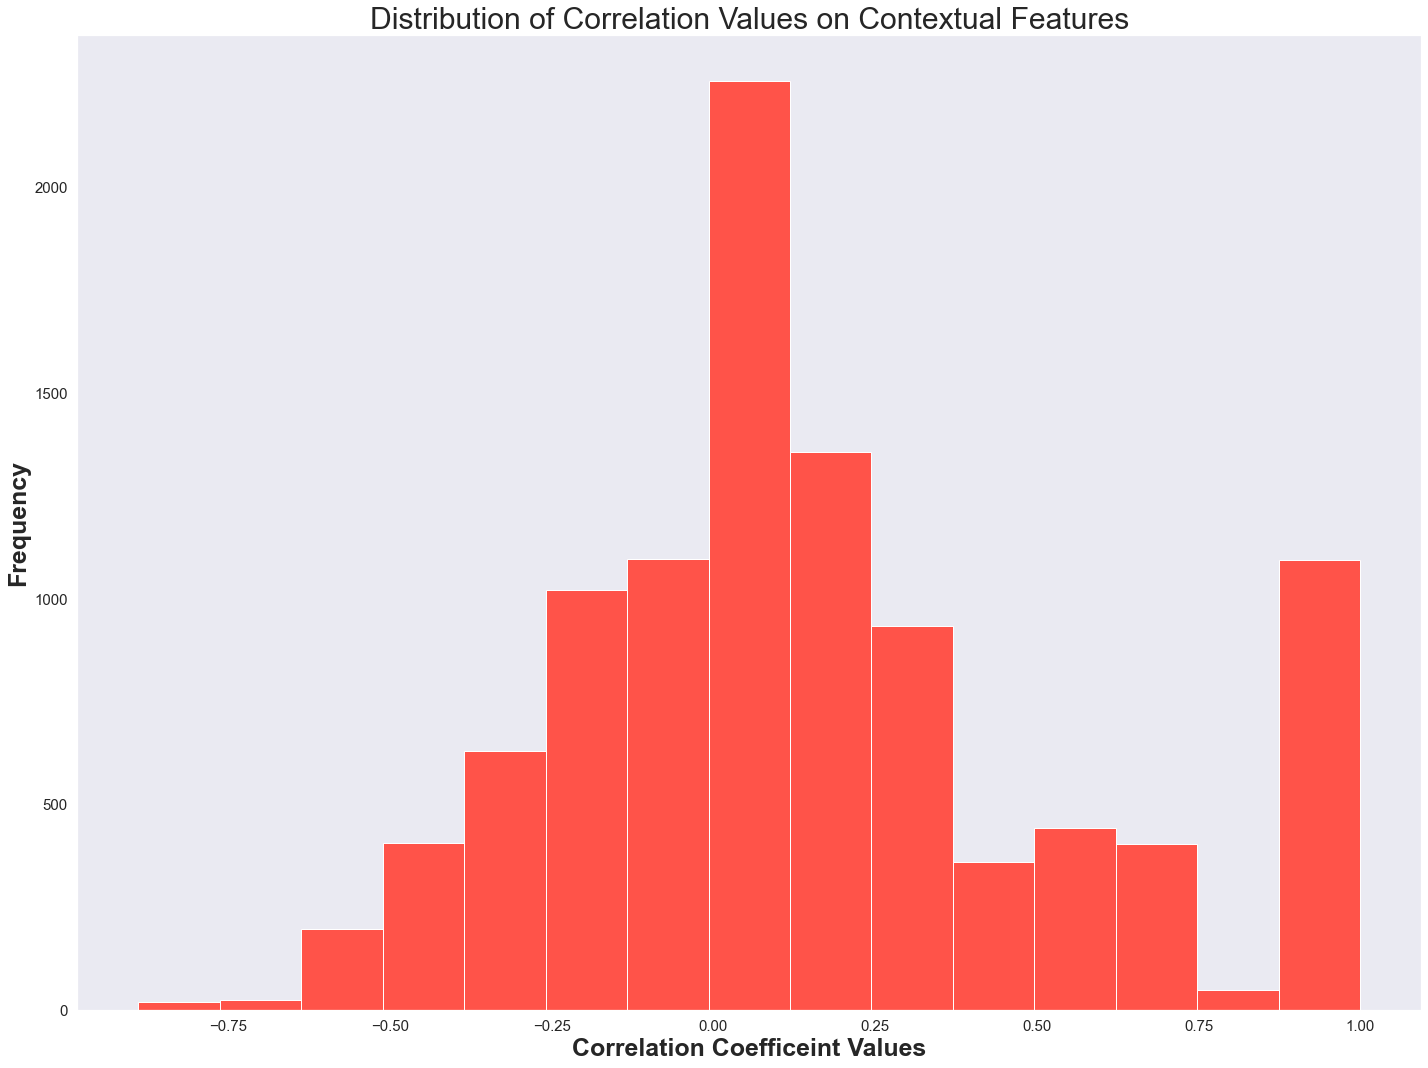

In [11]:
#created Histogram of Correlation Values
plt.figure(figsize= (15,10), facecolor='white')
plt.rcParams["figure.figsize"] = (20,15)
corr.plot(kind='hist',bins=15, color ='#ff5349')
plt.title('Distribution of Correlation Values on Contextual Features',fontsize=30)
plt.xlabel('Correlation Coefficeint Values',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.legend().remove()
plt.tight_layout()
plt.show()

# Splitting and standardizing data for analysis

<function matplotlib.pyplot.show(close=None, block=None)>

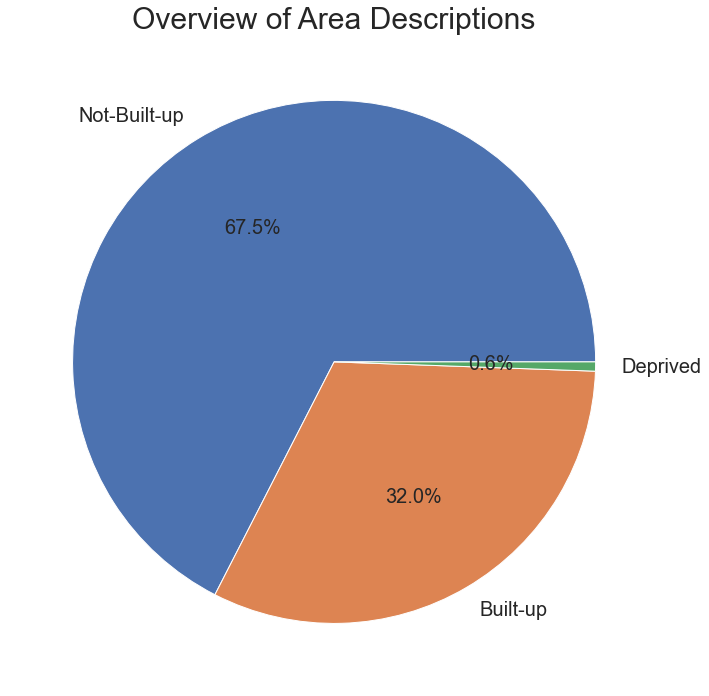

In [12]:
#created Pie chart before removing Not-Built-up areas
plt.figure(figsize= (10,10))
labels = ['Not-Built-up','Built-up', 'Deprived']
plt.title("Overview of Area Descriptions", fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [13]:
# Make directory to save results 
directory = os.path.dirname('result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [14]:
# select 0 and 1 classes
df =df[df['Label'].isin([0,1])]
X = df.drop('Label', axis=1)
y = df['Label']
# train, val, test split 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [15]:
# create pie chart data
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
0  15202  98.26     
1  269    1.74

<function matplotlib.pyplot.show(close=None, block=None)>

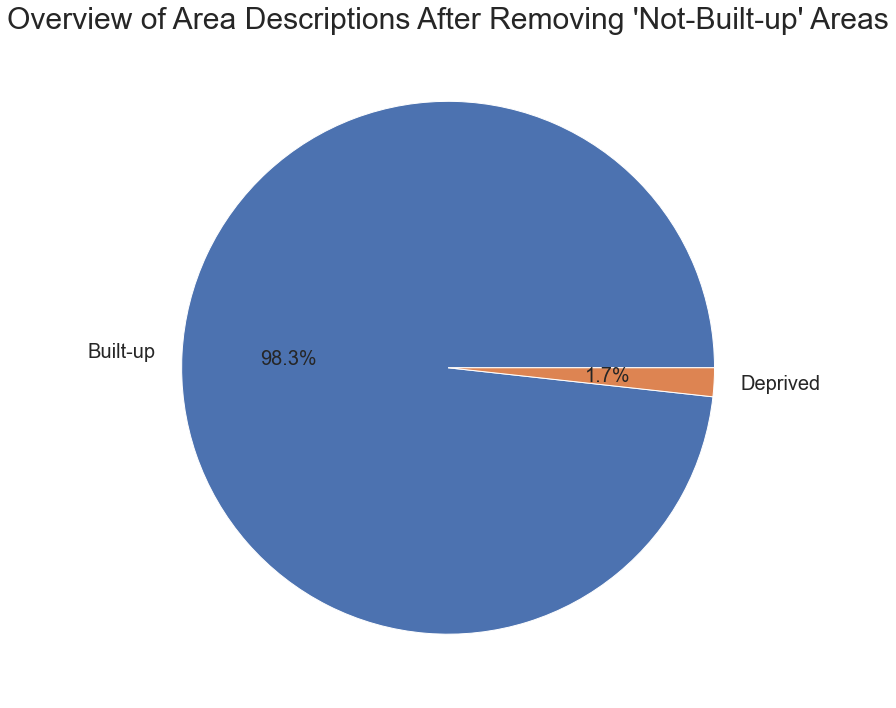

In [16]:
#created Pie chart after removing Not-Built-up areas
plt.figure(figsize= (15,10), facecolor='white')
plt.rcParams["figure.figsize"] = (20,15)
labels = ['Built-up', 'Deprived']
plt.title("Overview of Area Descriptions After Removing 'Not-Built-up' Areas", fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [17]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)
# Standardize Validation data
X_val = ss.fit_transform(X_val)
X_val_scaled = pd.DataFrame(X_val, columns= X.columns)
#Standardize Testing data
X_test = ss.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)

In [18]:
# Check shape of split data 
print('There are', X_train_scaled.shape[0], 'rows in the train data')
print('There are', X_val_scaled.shape[0], 'rows in the validation data')
print('There are', X_test_scaled.shape[0], 'rows in the test data')

There are 9282 rows in the train data
There are 3094 rows in the validation data
There are 3095 rows in the test data


In [19]:
X_train_scaled.head()

lbpm_sc3_kurtosis  lbpm_sc3_max  lbpm_sc3_mean  lbpm_sc3_skew  \
0  0.777012          -0.874037     -0.536910       0.990615        
1 -0.313919           0.888128      0.115834      -0.473379        
2 -0.402450          -0.380631     -0.328471      -0.271643        
3  1.277015           0.500452     -0.562435       0.963157        
4 -0.359765          -1.314579      3.700178      -0.351632        

   lbpm_sc3_variance  lbpm_sc5_kurtosis  lbpm_sc5_max  lbpm_sc5_mean  \
0 -0.908040           1.204756          -0.709398     -0.487358        
1  0.350242          -0.345988           0.543257     -0.332616        
2  0.845166          -0.764554          -0.192678      0.363779        
3 -0.455583           0.645276           0.391895     -0.611152        
4 -0.478913           1.089446          -1.398359      0.437581        

   lbpm_sc5_skew  lbpm_sc5_variance  lbpm_sc7_kurtosis  lbpm_sc7_max  \
0  1.176575      -0.817978           1.064086          -0.781740       
1 -0.364258       0.114965          -0.044202           0.294006       
2 -0.618917       0.826074          -0.981787          -0.242613       
3  0.454260      -0.244786           0.320194           0.497119       
4  1.191854      -1.019960           0.915898          -1.747153       

   lbpm_sc7_mean  lbpm_sc7_skew  lbpm_sc7_variance  lsr_sc31_line_contrast  \
0 -0.470195       1.079338      -0.840902           0.657129                 
1 -0.523499      -0.085775      -0.092410           0.727268                 
2  1.043629      -0.830935       0.590764           1.072893                 
3 -0.523499       0.138245      -0.101675          -0.428568                 
4  0.649182       1.238532      -1.178502           0.050298                 

   lsr_sc31_line_length  lsr_sc31_line_mean  lsr_sc51_line_contrast  \
0  0.602494             -0.404428            1.197758                 
1  0.768192              0.464325            0.598412                 
2  0.927664             -0.707814            1.159005                 
3 -0.477500              1.764048            0.070794                 
4  0.606132              2.668716            0.678201                 

   lsr_sc51_line_length  lsr_sc51_line_mean  lsr_sc71_line_contrast  \
0  1.146186             -0.561901            1.192509                 
1  0.750691              0.191321            0.400183                 
2  1.117738             -0.374265            0.828469                 
3 -0.032975              1.262605            0.503895                 
4  0.986196              2.314418            0.742678                 

   lsr_sc71_line_length  lsr_sc71_line_mean  ndvi_sc3_mean  ndvi_sc3_variance  \
0  1.160233             -0.731491            0.065127      -0.234402            
1  0.479831              0.104392           -1.024199      -0.849582            
2  0.807124             -0.116259           -0.665668      -0.604760            
3  0.441549              1.575927            0.068023       2.976490            
4  0.934586              2.439486            1.469850       1.394801            

   ndvi_sc5_mean  ndvi_sc5_variance  ndvi_sc7_mean  ndvi_sc7_variance  \
0  0.064347      -0.195858           0.063257      -0.185542            
1 -1.021733      -0.823921          -1.019852      -0.797255            
2 -0.654401      -0.635442          -0.638939      -0.603714            
3  0.054653       0.281802           0.037558       0.050457            
4  1.455831       1.475228           1.450305       1.439278            

   orb_sc31_kurtosis  orb_sc31_max  orb_sc31_mean  orb_sc31_skew  \
0 -0.133332          -0.159574     -0.147578      -0.148852        
1 -0.133332          -0.159574     -0.147578      -0.148852        
2 -0.133332          -0.159574     -0.147578      -0.148852        
3 -0.133332          -0.159574     -0.147578      -0.148852        
4 -0.133332          -0.159574     -0.147578      -0.148852        

   orb_sc31_variance  orb_sc51_kurtosis  orb_sc51_max  orb_sc51_mean  

# Mutual Information Feature Selection

In [20]:
#run select k best
fs_fit_fscore = SelectKBest(mutual_info_classif,  k='all')
fs_fit_fscore.fit_transform(X_train_scaled,y_train)
fs_indicies_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:144]
best_features_fscore = X.columns[fs_indicies_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indicies_fscore]
feature_importances_fscore

data_tuples = list(zip(best_features_fscore, feature_importances_fscore))
m_info_0_1 = pd.DataFrame(data_tuples,columns = ['Contextual_features','values'])

m_info_0_1.head()


Contextual_features    values
0  fourier_sc51_variance  0.007247
1  fourier_sc31_variance  0.007191
2  gabor_sc5_filter_12    0.005701
3  gabor_sc3_filter_1     0.005456
4  gabor_sc5_filter_7     0.005409

In [21]:
m_info_0_1.to_csv(path_or_buf='feature_selection/Contextual_features/' + 'Contextual_minfo_features_0_1.csv',index=False)

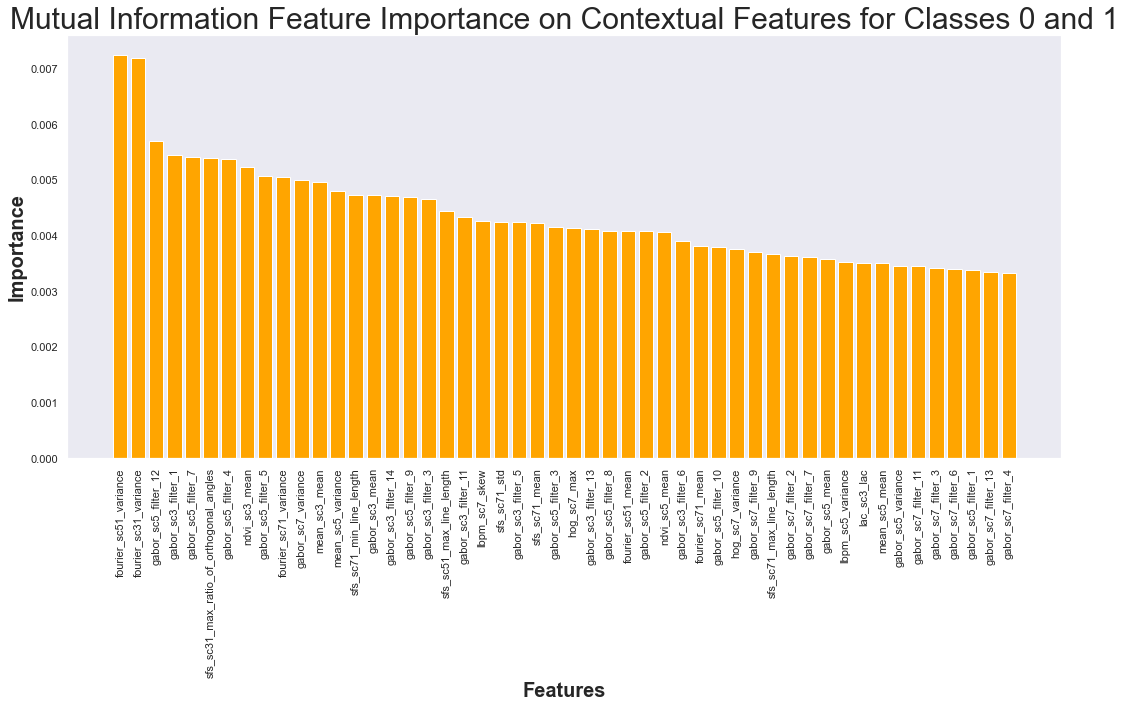

In [22]:
#Create a figure for Random Forest Feature Importance
fig = plt.figure(figsize=(15, 10),facecolor='white')

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(m_info_0_1['Contextual_features'][:50], m_info_0_1['values'][:50], color='orange')

# Set x-axis
plt.title('Mutual Information Feature Importance on Contextual Features for Classes 0 and 1', fontsize=30)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize = 20)
plt.grid(False)
# Save and show the figure
plt.tight_layout()
plt.show()

# Random Forest Model with Test Data

In [23]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [24]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                                     best_param  \
0  0.508573    {'model__min_samples_leaf': 1, 'model__min_samples_split': 2}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [25]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [26]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision      Recall                   F1-score
0  [0.9796445880452342, 0.0]  [1.0, 0.0]  [0.9897176432185408, 0.0]

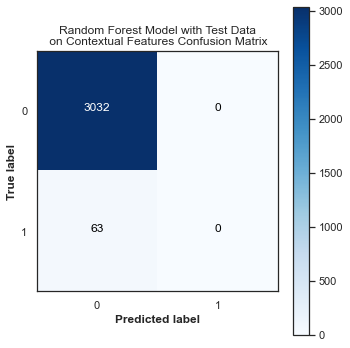

In [27]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Random Forest Model with Test Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [28]:
print('Random Forest Model with Test Data\n on Contextual Features Classification Report')
print(classification_report(y_test,y_test_pred))

Random Forest Model with Test Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3032
           1       0.00      0.00      0.00        63

    accuracy                           0.98      3095
   macro avg       0.49      0.50      0.49      3095
weighted avg       0.96      0.98      0.97      3095



# Random Forest Model with Validation Data

In [29]:
# Predict using Validation data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                       Recall  \
0  [0.9838292367399741, 1.0]  [1.0, 0.038461538461538464]   

                                    F1-score  
0  [0.9918487120965113, 0.07407407407407407]

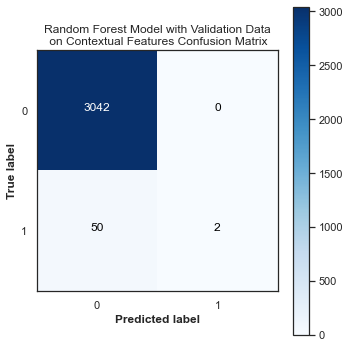

In [30]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Random Forest Model with Validation Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [31]:
print('Random Forest Model with Validation Data\n on Contextual Features Classification Report')
print(classification_report(y_val,y_val_pred))

Random Forest Model with Validation Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3042
           1       1.00      0.04      0.07        52

    accuracy                           0.98      3094
   macro avg       0.99      0.52      0.53      3094
weighted avg       0.98      0.98      0.98      3094



# Random Forest Feature Importance

In [32]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc_0_1 = df_fi_rfc_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc_0_1.head()

#save results as csv
df_fi_rfc_0_1.to_csv(path_or_buf='feature_selection/Contextual_features/' + 'Contextual_best_random_forest_features_0_1.csv',index=False)

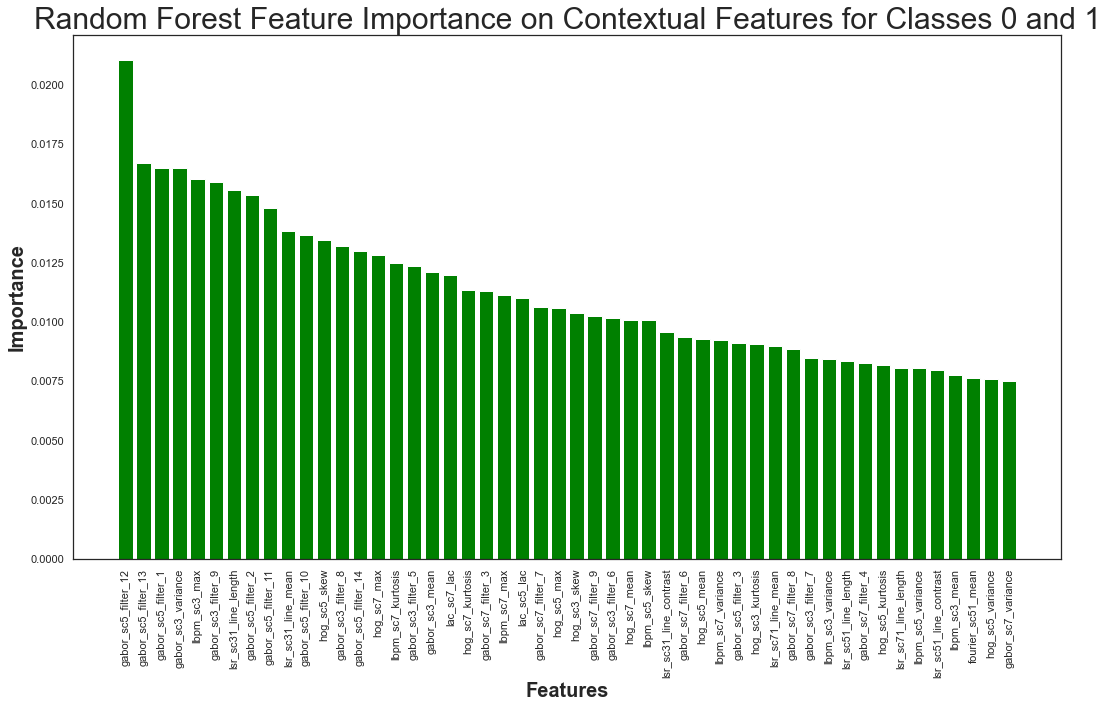

In [33]:
#Create a figure for Random Forest Feature Importance
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc_0_1['Features'][:50], df_fi_rfc_0_1['Importance'][:50], color='green')

# Set x-axis
plt.title('Random Forest Feature Importance on Contextual Features for Classes 0 and 1', fontsize=30)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize = 20)

# Save and show the figure
plt.tight_layout()
plt.show()

# Logistic Model with Testing Data

In [34]:
# Logistic model construction
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]


In [35]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                            best_param  \
0  0.513642    {'model__C': 1, 'model__tol': 1e-05}   

                                          best_estimator  
0  (LogisticRegression(C=1, random_state=42, tol=1e-05))

In [36]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision      Recall                   F1-score
0  [0.9796445880452342, 0.0]  [1.0, 0.0]  [0.9897176432185408, 0.0]

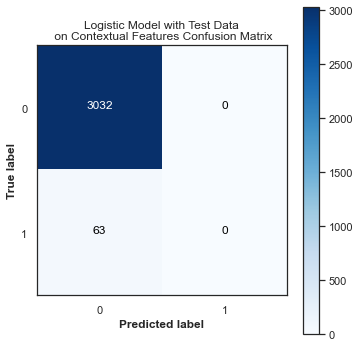

In [37]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Logistic Model with Test Data\n on Contextual Features Confusion Matrix')
plt.show()

In [38]:
print('Logistic Model with Test Data\n on Contextual Features Classification Report') 
print(classification_report(y_test,y_test_pred))

    

Logistic Model with Test Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3032
           1       0.00      0.00      0.00        63

    accuracy                           0.98      3095
   macro avg       0.49      0.50      0.49      3095
weighted avg       0.96      0.98      0.97      3095



# Logistic Model with Validation Data

In [39]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                       Recall  \
0  [0.9838292367399741, 1.0]  [1.0, 0.038461538461538464]   

                                    F1-score  
0  [0.9918487120965113, 0.07407407407407407]

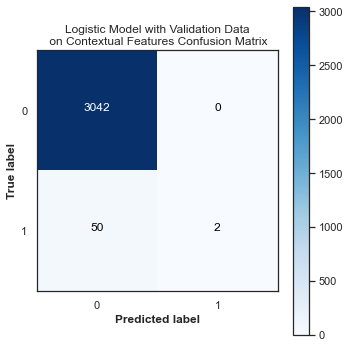

In [40]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Logistic Model with Validation Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [41]:
print('Logistic Model with Test Data\n on Contextual Features Classification Report')  
print(classification_report(y_val,y_val_pred))


Logistic Model with Test Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3042
           1       1.00      0.04      0.07        52

    accuracy                           0.98      3094
   macro avg       0.99      0.52      0.53      3094
weighted avg       0.98      0.98      0.98      3094



# Logistic Feature Importance

In [42]:
# Evaluate odds of each variable and sort by odds value
odds = np.exp(best_estimator_gs["model"].coef_[0])
best_log =pd.DataFrame(odds, X_train_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)
best_log.reset_index(inplace=True)
best_log.rename(columns={'index':'Contextual_features','odds':'values'},inplace=True)
best_log.head()

Contextual_features    values
0  fourier_sc31_mean         2.582292
1  sfs_sc51_max_line_length  2.166072
2  sfs_sc71_std              2.056901
3  mean_sc3_variance         1.908998
4  lsr_sc71_line_contrast    1.826235

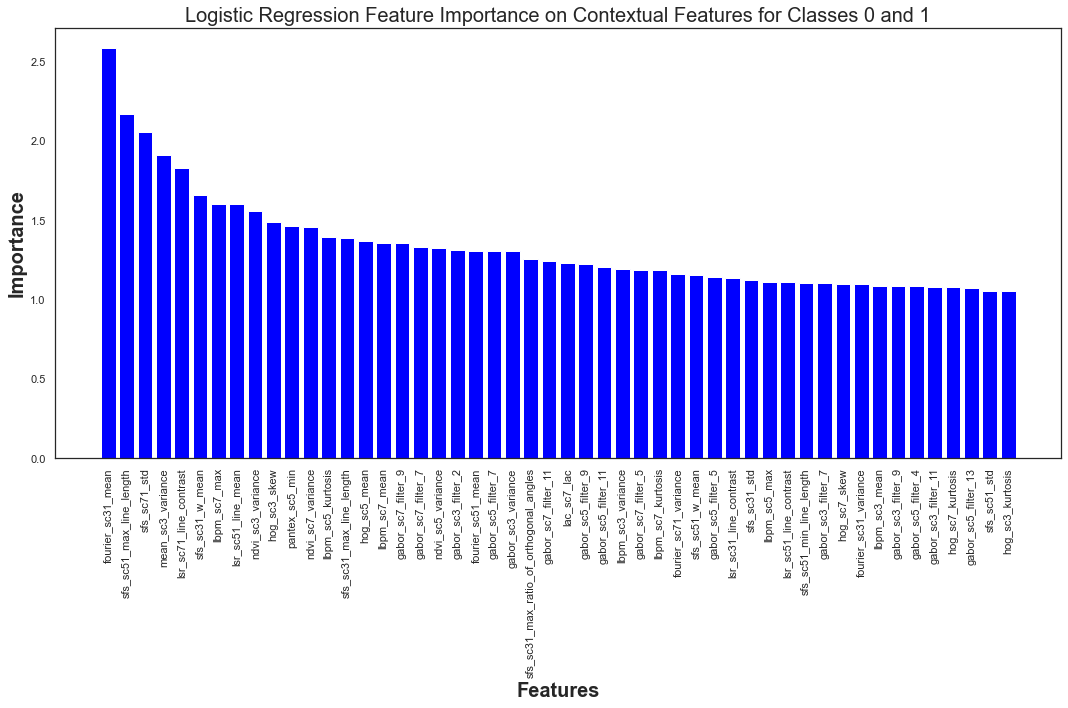

In [43]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(best_log['Contextual_features'][:50], best_log['values'][:50], color='blue')

# Set x-axis
plt.title('Logistic Regression Feature Importance on Contextual Features for Classes 0 and 1', fontsize=20)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

In [44]:
#save best logistic features in csv file
best_log.to_csv(path_or_buf='feature_selection/Contextual_features/' + 'Contextual_best_logistic_features_0_1.csv',index=False)



# Gradient Boosting with Testing Data

In [45]:
# hyper parameters for testing
parameter_space = {
    'loss': ['deviance'],
    'criterion': ['friedman_mse', 'mse'],
    'n_estimators': [100],
    'subsample': [1.0, 0.6],
    "learning_rate": [0.01, 0.05],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 3),
    "max_depth": [3, 8],
    "max_features": ["log2", "sqrt"],
}

clf = GradientBoostingClassifier()

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score  \
0  0.495817     

                                                                                                                                                                                                   best_param  \
0  {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 1.0}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [46]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [47]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision      Recall                   F1-score
0  [0.9796445880452342, 0.0]  [1.0, 0.0]  [0.9897176432185408, 0.0]

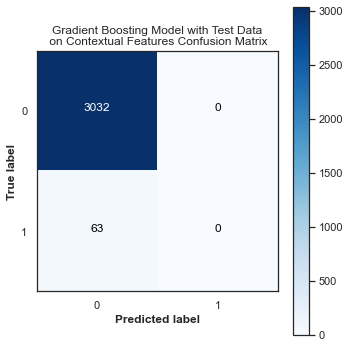

In [48]:
# Gradient Boosting Results
# create confusion matrix for Gradient Boosting test data
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Gradient Boosting Model with Test Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [49]:
print('Gradient Boosting Model with Testing Data\n on Contextual Features Classification Report') 
print(classification_report(y_test,y_test_pred))

Gradient Boosting Model with Testing Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3032
           1       0.00      0.00      0.00        63

    accuracy                           0.98      3095
   macro avg       0.49      0.50      0.49      3095
weighted avg       0.96      0.98      0.97      3095



# Gradient Boosting with Validation Data

In [50]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision      Recall                   F1-score
0  [0.9831932773109243, 0.0]  [1.0, 0.0]  [0.9915254237288135, 0.0]

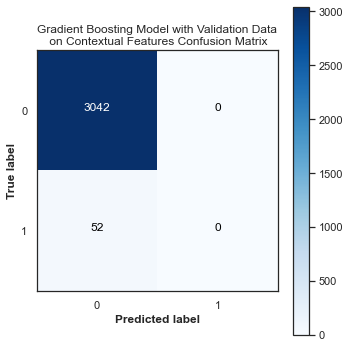

In [51]:
# Gradient Boosting Results
# create confusion matrix for Gradient Boosting test data
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Gradient Boosting Model with Validation Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [52]:
print('Gradient Boosting Model with Validation Data\n on Contextual Features Classification Report') 
print(classification_report(y_val,y_val_pred))

Gradient Boosting Model with Validation Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3042
           1       0.00      0.00      0.00        52

    accuracy                           0.98      3094
   macro avg       0.49      0.50      0.50      3094
weighted avg       0.97      0.98      0.97      3094



In [53]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_gb, best_param_gb, best_estimator_gb = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_gb_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_gb.feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

In [54]:
# Sort df_fi_rfc in descending order of the importance
df_fi_gb_0_1 = df_fi_gb_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_gb_0_1.head()

#save results as csv
df_fi_gb_0_1.to_csv(path_or_buf='feature_selection/Contextual_features/' + 'Contextual_best_gradient_boosting_features_0_1.csv',index=False)

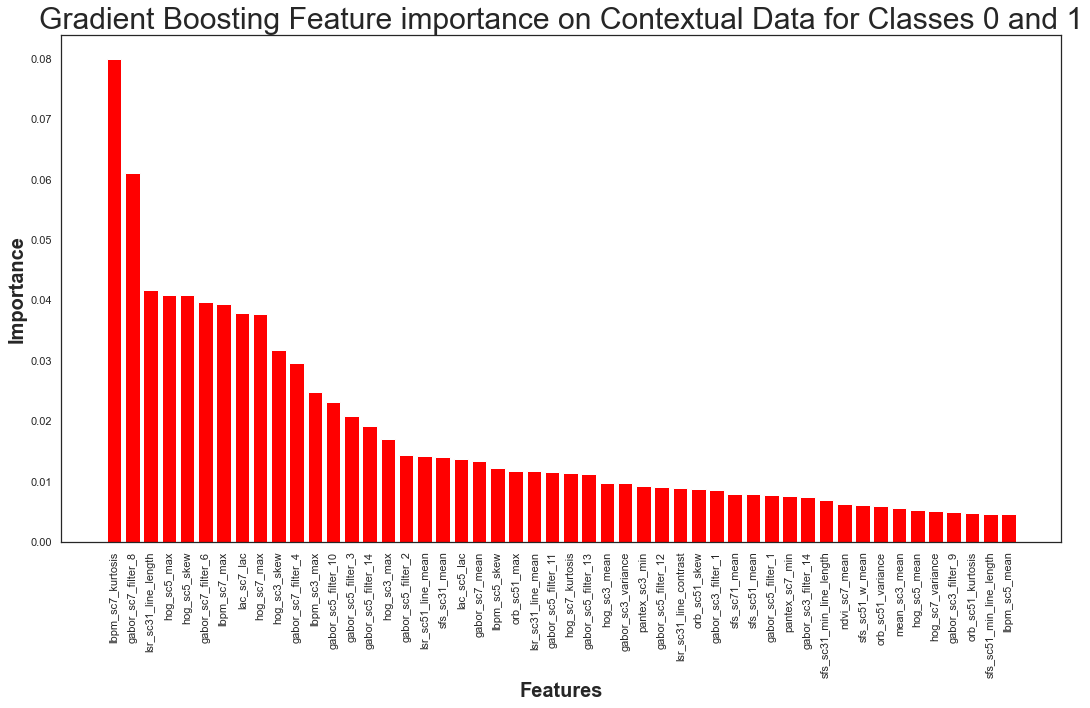

In [55]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_gb_0_1['Features'][:50], df_fi_gb_0_1['Importance'][:50], color='red')

# Set x-axis
plt.title('Gradient Boosting Feature importance on Contextual Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

# AdaBoosting on Testing Data

In [56]:
# hyper parameters for testing
parameter_space = {
    'n_estimators': [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.025]
}

clf = AdaBoostClassifier(random_state=42)

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                   best_param  \
0  0.495817    {'learning_rate': 0.01, 'n_estimators': 50}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              best_estimator  
0  (DecisionTreeClassifier(max_depth=1, random_state=1608637542), DecisionTreeClassifier(max_depth=1, random_state=1273642419), DecisionTreeClassifier(max_depth=1, random_state=1935803228), DecisionTreeClassifier(max_depth=1, random_state=787846414), DecisionTreeClassifier(max_depth=1, random_state=996406378), DecisionTreeClassifier(max_depth=1, random_state=1201263687), DecisionTreeClassifier(max_depth=1, random_state=423734972), DecisionTreeClassifier(max_depth=1, random_state=415968276), DecisionTreeClassifier(max_depth=1, random_state=670094950), DecisionTreeClassifier(max_depth=1, random_state=1914837113), DecisionTreeClassifier(max_depth=1, random_state=669991378), DecisionTreeClassifier(max_depth=1, random_state=429389014), DecisionTreeClassifier(max_depth=1, random_state=249467210), Decis

In [57]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [58]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision      Recall                   F1-score
0  [0.9796445880452342, 0.0]  [1.0, 0.0]  [0.9897176432185408, 0.0]

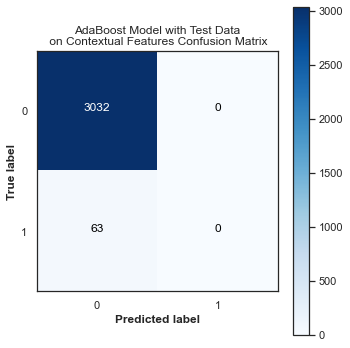

In [59]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('AdaBoost Model with Test Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [60]:
print('AdaBoost Model with Testing Data\n on Contextual Features Classification Report') 
print(classification_report(y_test,y_test_pred))

AdaBoost Model with Testing Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3032
           1       0.00      0.00      0.00        63

    accuracy                           0.98      3095
   macro avg       0.49      0.50      0.49      3095
weighted avg       0.96      0.98      0.97      3095



# AdaBoosting on Validation Data 

In [61]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision      Recall                   F1-score
0  [0.9831932773109243, 0.0]  [1.0, 0.0]  [0.9915254237288135, 0.0]

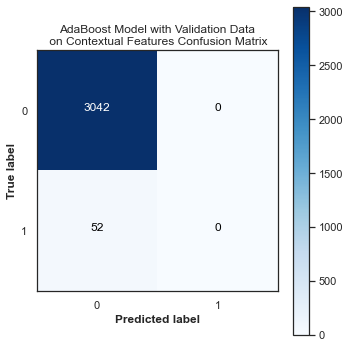

In [62]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('AdaBoost Model with Validation Data\n on Contextual Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [63]:
print('AdaBoost Model with Validation Data\n on Contextual Features Classification Report') 
print(classification_report(y_val,y_val_pred))

AdaBoost Model with Validation Data
 on Contextual Features Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3042
           1       0.00      0.00      0.00        52

    accuracy                           0.98      3094
   macro avg       0.49      0.50      0.50      3094
weighted avg       0.97      0.98      0.97      3094



# AdaBoosting Feature Importance

In [64]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_ad, best_param_ad, best_estimator_ad = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_ad_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_ad.feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

In [65]:
# Sort df_fi_rfc in descending order of the importance
df_fi_ad_0_1 = df_fi_ad_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_ad_0_1.head()

#save results as csv
df_fi_ad_0_1.to_csv(path_or_buf='feature_selection/Contextual_features/' + 'Contextual_best_ada_boosting_features_0_1.csv',index=False)

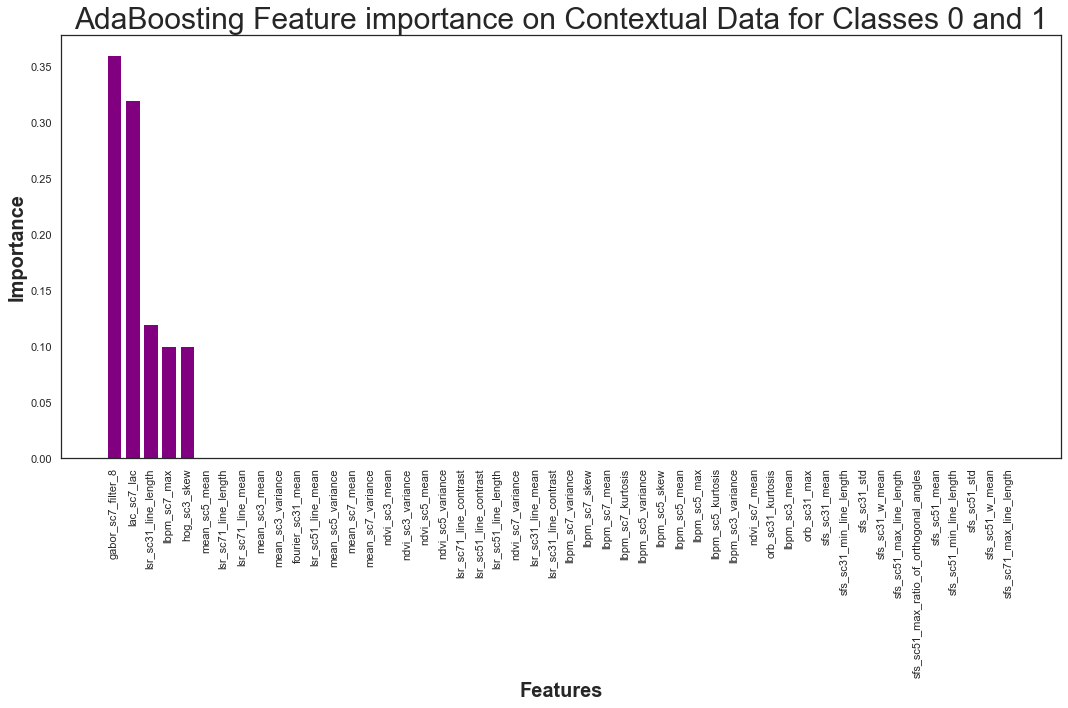

In [66]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_ad_0_1['Features'][:50], df_fi_ad_0_1['Importance'][:50], color='purple')

# Set x-axis
plt.title('AdaBoosting Feature importance on Contextual Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

# Comparing Feature Selections of Different Models

In [67]:
# Random Forest feature importance two classes
df_fi_rfc_0_1 = df_fi_rfc_0_1.rename(columns = {'Features':'Contextual_features','Importance':'values'})
df_fi_rfc_0_1['top_Random_Forest_0_1']= range(1,len(df_fi_rfc_0_1)+1)
#df_fi_rfc_0_1.drop(['values'],axis=1, inplace=True)
df_fi_rfc_0_1.head()

Contextual_features    values  top_Random_Forest_0_1
0  gabor_sc5_filter_12  0.02106   1                    
1  gabor_sc5_filter_13  0.016681  2                    
2  gabor_sc5_filter_1   0.016502  3                    
3  gabor_sc3_variance   0.016486  4                    
4  lbpm_sc3_max         0.01604   5

In [68]:
# logisitc featue importance for two classes
best_log['top_logistic_0_1'] = range(1,len(best_log)+1)
#best_log.drop(['values'],axis=1, inplace=True)
best_log.head()

Contextual_features    values  top_logistic_0_1
0  fourier_sc31_mean         2.582292  1               
1  sfs_sc51_max_line_length  2.166072  2               
2  sfs_sc71_std              2.056901  3               
3  mean_sc3_variance         1.908998  4               
4  lsr_sc71_line_contrast    1.826235  5

In [69]:
# Gradient Boosting feature importance for two classes
df_fi_gb_0_1 = df_fi_gb_0_1.rename(columns = {'Features':'Contextual_features','Importance':'values'})
df_fi_gb_0_1['top_Gradient_Boosting_0_1']= range(1,len(df_fi_gb_0_1)+1)
#df_fi_gb_0_1.drop(['values'],axis=1, inplace=True)
df_fi_gb_0_1.head()

Contextual_features    values  top_Gradient_Boosting_0_1
0  lbpm_sc7_kurtosis     0.079914  1                        
1  gabor_sc7_filter_8    0.060944  2                        
2  lsr_sc31_line_length  0.041644  3                        
3  hog_sc5_max           0.040842  4                        
4  hog_sc5_skew          0.040835  5

In [70]:
df_fi_ad_0_1 = df_fi_ad_0_1.rename(columns = {'Features':'Contextual_features','Importance':'values'})
df_fi_ad_0_1['top_Ada_Boosting_0_1']= range(1,len(df_fi_ad_0_1)+1)
#df_fi_gb_0_1.drop(['values'],axis=1, inplace=True)
df_fi_ad_0_1.head()

Contextual_features values  top_Ada_Boosting_0_1
0  gabor_sc7_filter_8    0.36   1                   
1  lac_sc7_lac           0.32   2                   
2  lsr_sc31_line_length  0.12   3                   
3  lbpm_sc7_max          0.1    4                   
4  hog_sc3_skew          0.1    5

In [71]:
m_info_0_1['minfo_0_1'] = range(1,len(m_info_0_1)+1)
m_info_0_1.head()

Contextual_features    values  minfo_0_1
0  fourier_sc51_variance  0.007247  1        
1  fourier_sc31_variance  0.007191  2        
2  gabor_sc5_filter_12    0.005701  3        
3  gabor_sc3_filter_1     0.005456  4        
4  gabor_sc5_filter_7     0.005409  5

In [72]:
#merge best features for all three methods 
best_0 = best_log.merge(df_fi_rfc_0_1[['Contextual_features','top_Random_Forest_0_1']],how='inner', on = 'Contextual_features')
best_1 = best_0.merge(df_fi_gb_0_1[['Contextual_features','top_Gradient_Boosting_0_1']],how='inner',on = 'Contextual_features')
best_2 = best_1.merge(df_fi_ad_0_1[['Contextual_features','top_Ada_Boosting_0_1']],how='inner',on = 'Contextual_features')
best = best_2.merge(m_info_0_1[['Contextual_features','minfo_0_1']],how='inner',on = 'Contextual_features')
#create rank column
best['combined_rank'] = best['top_logistic_0_1'] + best['top_Random_Forest_0_1'] + best['top_Gradient_Boosting_0_1'] + best['top_Ada_Boosting_0_1'] + best['minfo_0_1']

best = best.sort_values(by= ['combined_rank'], ascending =True).reset_index(drop=True)
best['rank']= range(1,len(best)+1)
del best['values']
best.tail(20)

Contextual_features  top_logistic_0_1  top_Random_Forest_0_1  \
124  orb_sc71_variance    117               121                     
125  gabor_sc5_filter_8   59                133                     
126  hog_sc7_variance     143               128                     
127  hog_sc3_mean         129               70                      
128  gabor_sc7_filter_11  25                138                     
129  fourier_sc71_mean    119               116                     
130  orb_sc71_mean        133               108                     
131  gabor_sc5_filter_6   66                137                     
132  sfs_sc71_w_mean      126               75                      
133  gabor_sc7_filter_13  54                132                     
134  gabor_sc3_filter_12  135               110                     
135  gabor_sc5_variance   72                144                     
136  orb_sc71_skew        137               125                     
137  gabor_sc5_mean       116               134                     
138  gabor_sc7_filter_2   112               136                     
139  gabor_sc7_filter_14  106               143                     
140  lbpm_sc3_skew        132               127                     
141  gabor_sc7_filter_12  89                140                     
142  gabor_sc7_filter_1   131               131                     
143  gabor_sc7_filter_10  97                142                     

     top_Gradient_Boosting_0_1  top_Ada_Boosting_0_1  minfo_0_1  \
124  62                         71                    98          
125  143                        109                   28          
126  46                         124                   35          
127  28                         113                   138         
128  134                        141                   45          
129  119                        97                    33          
130  72                         69                    108         
131  140                        89                    63          
132  67                         144                   84          
133  130                        139                   49          
134  112                        101                   56          
135  141                        120                   44          
136  95                         70                    96          
137  129                        111                   40          
138  114                        137                   38          
139  128                        138                   61          
140  118                        73                    127         
141  133                        140                   80          
142  137                        143                   51          
143  135                        142                   82          

     combined_rank  rank  
124  469            125   
125  472            126   
126  476            127   
127  478            128   
128  483            129   
129  484            130   
130  490            131   
131  495            132   
132  496            133   
133  504            134   
134  514            135   
135  521            136   
136  523            137   
137  530            138   
138  537            139   
139  576            140   
140  577            141   
141  582            142   
142  593            143   
143  598            144

In [73]:
# save rank file
best.to_csv(path_or_buf='feature_selection/Contextual_features/' + 'Contextual_Features_Ranking.csv',index=False)


In [74]:
best.head()

Contextual_features  top_logistic_0_1  top_Random_Forest_0_1  \
0  lbpm_sc7_max         7                 22                      
1  hog_sc3_skew         10                26                      
2  gabor_sc7_filter_8   91                38                      
3  gabor_sc5_filter_12  69                1                       
4  gabor_sc5_filter_2   52                8                       

   top_Gradient_Boosting_0_1  top_Ada_Boosting_0_1  minfo_0_1  combined_rank  \
0  7                          4                     77         117             
1  10                         5                     69         120             
2  2                          1                     52         184             
3  31                         82                    3          186             
4  17                         85                    30         192             

   rank  
0  1     
1  2     
2  3     
3  4     
4  5